# Lab 1 Analysis Example using Thicket

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
tk = th.Thicket.from_caliperreader(glob("/home/kdai/project/cpu/mpi_naive/*.cali"))
# tk = th.Thicket.from_caliperreader(glob("/home/kdai/project/cpu/mpi_naive/*.cali"))

In [3]:
# Performance data
tk.dataframe

nid   spot.channel  \
node                                        profile                          
{'name': 'main', 'type': 'function'}        55680237      1  regionprofile   
                                            228708971     1  regionprofile   
                                            231347301     1  regionprofile   
                                            434553198     1  regionprofile   
                                            509983399     1  regionprofile   
                                            577689178     1  regionprofile   
                                            628104210     1  regionprofile   
                                            746116789     1  regionprofile   
                                            815761037     1  regionprofile   
                                            875795976     1  regionprofile   
                                            914039794     1  regionprofile   
                                            1110896783    1  regionprofile   
                                            1166979365    1  regionprofile   
                                            1200568579    1  regionprofile   
                                            1241847604    1  regionprofile   
                                            1364138209    1  regionprofile   
                                            1444647100    1  regionprofile   
                                            1627521132    1  regionprofile   
                                            1808305170    1  regionprofile   
                                            1914431432    1  regionprofile   
                                            2264701276    1  regionprofile   
                                            2368161009    1  regionprofile   
                                            2462647824    1  regionprofile   
                                            2488467768    1  regionprofile   
                                            2539287633    1  regionprofile   
                                            2628843425    1  regionprofile   
                                            2634688117    1  regionprofile   
                                            2663076400    1  regionprofile   
                                            2910291385    1  regionprofile   
                                            3087841263    1  regionprofile   
                                            3259915785    1  regionprofile   
                                            3337785602    1  regionprofile   
                                            3617873547    1  regionprofile   
                                            3956807593    1  regionprofile   
                                            4262900814    1  regionprofile   
                                            4277215041    1  regionprofile   
{'name': 'comm', 'type': 'function'}        55680237      3  regionprofile   
                                            228708971     3  regionprofile   
                                            231347301     3  regionprofile   
                                            434553198     3  regionprofile   
                                            509983399     3  regionprofile   
                                            577689178     3  regionprofile   
                                            628104210     3  regionprofile   
                                            746116789     3  regionprofile   
                                            815761037     3  regionprofile   
                                            875795976     3  regionprofile   
                                            914039794     3  regionprofile   
                                            1110896783    3  regionprofile   
                                            1166979365    3  regionprofile   
                                            1200568579    3  regionprofile   


Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [4]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,num_procs,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,
55680237,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,256-128.cali,true,1699848504,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mpi_naive, 256]",c,MPI Naive Matrix Multiplication,MPI,int,4,256,128,8,Online
228708971,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,256-4.cali,true,1699848350,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mpi_naive, 256]",c,MPI Naive Matrix Multiplication,MPI,int,4,256,4,8,Online
231347301,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,128-16.cali,true,1699848333,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mpi_naive, 128]",c,MPI Naive Matrix Multiplication,MPI,int,4,128,16,8,Online
434553198,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,256-64.cali,true,1699848504,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mpi_naive, 256]",c,MPI Naive Matrix Multiplication,MPI,int,4,256,64,8,Online
509983399,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,2048-4.cali,true,1699849084,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mpi_naive, 2048]",c,MPI Naive Matrix Multiplication,MPI,int,4,2048,4,8,Online
577689178,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,4096-8.cali,true,1699849725,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mpi_naive, 4096]",c,MPI Naive Matrix Multiplication,MPI,int,4,4096,8,8,Online
628104210,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,128-8.cali,true,1699848324,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mpi_naive, 128]",c,MPI Naive Matrix Multiplication,MPI,int,4,128,8,8,Online
746116789,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,2048-32.cali,true,1699849705,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mpi_naive, 2048]",c,MPI Naive Matrix Multiplication,MPI,int,4,2048,32,8,Online
815761037,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,1024-8.cali,true,1699848985,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./mpi_naive, 1024]",c,MPI Naive Matrix Multiplication,MPI,int,4,1024,8,8,Online


In [5]:
gb = tk.groupby("num_procs")

6  thickets created...
{4: <thicket.thicket.Thicket object at 0x2aff3e07f730>, 8: <thicket.thicket.Thicket object at 0x2aff3df1edf0>, 16: <thicket.thicket.Thicket object at 0x2aff3dfea6a0>, 32: <thicket.thicket.Thicket object at 0x2aff3dffe040>, 64: <thicket.thicket.Thicket object at 0x2aff3df59ca0>, 128: <thicket.thicket.Thicket object at 0x2aff3e014070>}


Compose these 3 groups column-wise to get a holistic view of the data

In [50]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [17]:
ctk.dataframe

4                 \
                                                      nid   spot.channel   
node                                        InputSize                      
{'name': 'main', 'type': 'function'}        128         1  regionprofile   
                                            256         1  regionprofile   
                                            512         1  regionprofile   
                                            1024        1  regionprofile   
                                            2048        1  regionprofile   
                                            4096        1  regionprofile   
{'name': 'comm', 'type': 'function'}        128         3  regionprofile   
                                            256         3  regionprofile   
                                            512         3  regionprofile   
                                            1024        3  regionprofile   
                                            2048        3  regionprofile   
                                            4096        3  regionprofile   
{'name': 'barrier', 'type': 'function'}     128         7  regionprofile   
                                            256         7  regionprofile   
                                            512         7  regionprofile   
                                            1024        7  regionprofile   
                                            2048        7  regionprofile   
                                            4096        7  regionprofile   
{'name': 'comm_large', 'type': 'function'}  128         4  regionprofile   
                                            256         4  regionprofile   
                                            512         4  regionprofile   
                                            1024        4  regionprofile   
                                            2048        4  regionprofile   
                                            4096        4  regionprofile   
{'name': 'bcast', 'type': 'function'}       128         6  regionprofile   
                                            256         6  regionprofile   
                                            512         6  regionprofile   
                                            1024        6  regionprofile   
                                            2048        6  regionprofile   
                                            4096        6  regionprofile   
{'name': 'gather', 'type': 'function'}      128        10  regionprofile   
                                            256        10  regionprofile   
                                            512        10  regionprofile   
                                            1024       10  regionprofile   
                                            2048       10  regionprofile   
                                            4096       10  regionprofile   
{'name': 'scatter', 'type': 'function'}     128         5  regionprofile   
                                            256         5  regionprofile   
                                            512         5  regionprofile   
                                            1024        5  regionprofile   
                                            2048        5  regionprofile   
                                            4096        5  regionprofile   
{'name': 'comp', 'type': 'function'}        128         8  regionprofile   
                                            256         8  regionprofile   
                                            512         8  regionprofile   
                                            1024        8  regionprofile   
                                            2048        8  regionprofile   
                                            4096        8  regionprofile   
{'name': 'comp_large', 'type': 'function'}  128         9  regionprofile   
                                            256         9  regionprofile   
                            

Perform pandas operations to get the table in a desirable format for plotting

In [51]:
# Drop unwanted columns
array = [("node","")]
for i in (4, 8, 16, 32, 64, 128):
    array.append((i,"nid"))
    array.append((i,"spot.channel"))
    # comment out the one you wnat to plot
#     array.append((i,"Min time/rank"))
    array.append((i,"Max time/rank"))
    array.append((i,"Avg time/rank"))
    array.append((i,"Total time"))
    array.append((i,"Variance time/rank"))



ctk.dataframe = ctk.dataframe.reset_index().drop(array, axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])
# Drop "time" label as it is redundant
# ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

In [52]:
ctk.dataframe.columns

MultiIndex([(  4, 'Avg time/rank'),
            (  8, 'Avg time/rank'),
            ( 16, 'Avg time/rank'),
            ( 32, 'Avg time/rank'),
            ( 64, 'Avg time/rank'),
            (128, 'Avg time/rank')],
           )

In [53]:
ctk.dataframe

4             8            16            32  \
                      Avg time/rank Avg time/rank Avg time/rank Avg time/rank   
name        InputSize                                                           
main        128            0.393913      0.434221      7.685408      6.933099   
            256            0.360285      0.503490      0.518767      0.589362   
            512            0.615386      0.620466      0.564259      0.548887   
            1024           3.432799      2.105368      1.323841      0.928738   
            2048          32.304383     16.129681      8.386800      5.492441   
            4096         665.414500    352.633664    179.756225     88.866504   
comm        128            0.012740      0.039622      0.027731      0.039611   
            256            0.007881      0.016410      0.024759      0.062421   
            512            0.040008      0.044562      0.039379      0.065459   
            1024           0.109895      0.103689      0.115836      0.103431   
            2048           0.402572      0.406246      0.407238      0.286600   
            4096           2.929713     10.009370      6.491085      3.239299   
barrier     128            0.004557      0.002949      0.009133      0.004763   
            256            0.001010      0.001958      0.004838      0.006936   
            512            0.018554      0.023223      0.012067      0.008900   
            1024           0.043563      0.041896      0.048527      0.026755   
            2048           0.242873      0.170823      0.148847      0.063065   
            4096           1.299332      7.678897      5.098445      2.152337   
comm_large  128            0.008121      0.036611      0.018531      0.034784   
            256            0.006806      0.014388      0.019855      0.055418   
            512            0.021367      0.021272      0.027245      0.056492   
            1024           0.066267      0.061718      0.067234      0.076603   
            2048           0.159628      0.235343      0.258317      0.223458   
            4096           1.630311      2.330399      1.392561      1.086883   
bcast       128            0.000199      0.019746      0.008415      0.014098   
            256            0.000361      0.003632      0.005929      0.024792   
            512            0.001036      0.002849      0.008679      0.024064   
            1024           0.002182      0.013465      0.015951      0.026890   
            2048           0.014675      0.016102      0.022614      0.046346   
            4096           0.035546      0.123322      0.081421      0.078199   
gather      128            0.000043      0.000947      0.000700      0.000309   
            256            0.000084      0.000071      0.000654      0.000045   
            512            0.005274      0.000127      0.000485      0.000256   
            1024           0.024741      0.000969      0.002511      0.000253   
            2048           0.004830      0.053423      0.058847      0.001793   
            4096           1.047802      1.476770      0.506882      0.311317   
scatter     128            0.007841      0.015868      0.009361      0.020324   
            256            0.006323      0.010634      0.013221      0.030247   
            512            0.015009      0.018244      0.018029      0.032107   
            1024           0.039295      0.047224      0.048713      0.049397   
            2048           0.140054      0.165750      0.176786      0.175257   
            4096           0.546894      0.730238      0.804189      0.697292   
comp        128            0.001636      0.000822      0.000429      0.000221   
            256            0.012767      0.006428      0.003227      0.001626   
            512            0.114367      0.062361      0.033438      0.016024   
            1024           1.490861      0.769409      0.377665      0.198538   
            2048          15.463790      7.687774      3.810736  

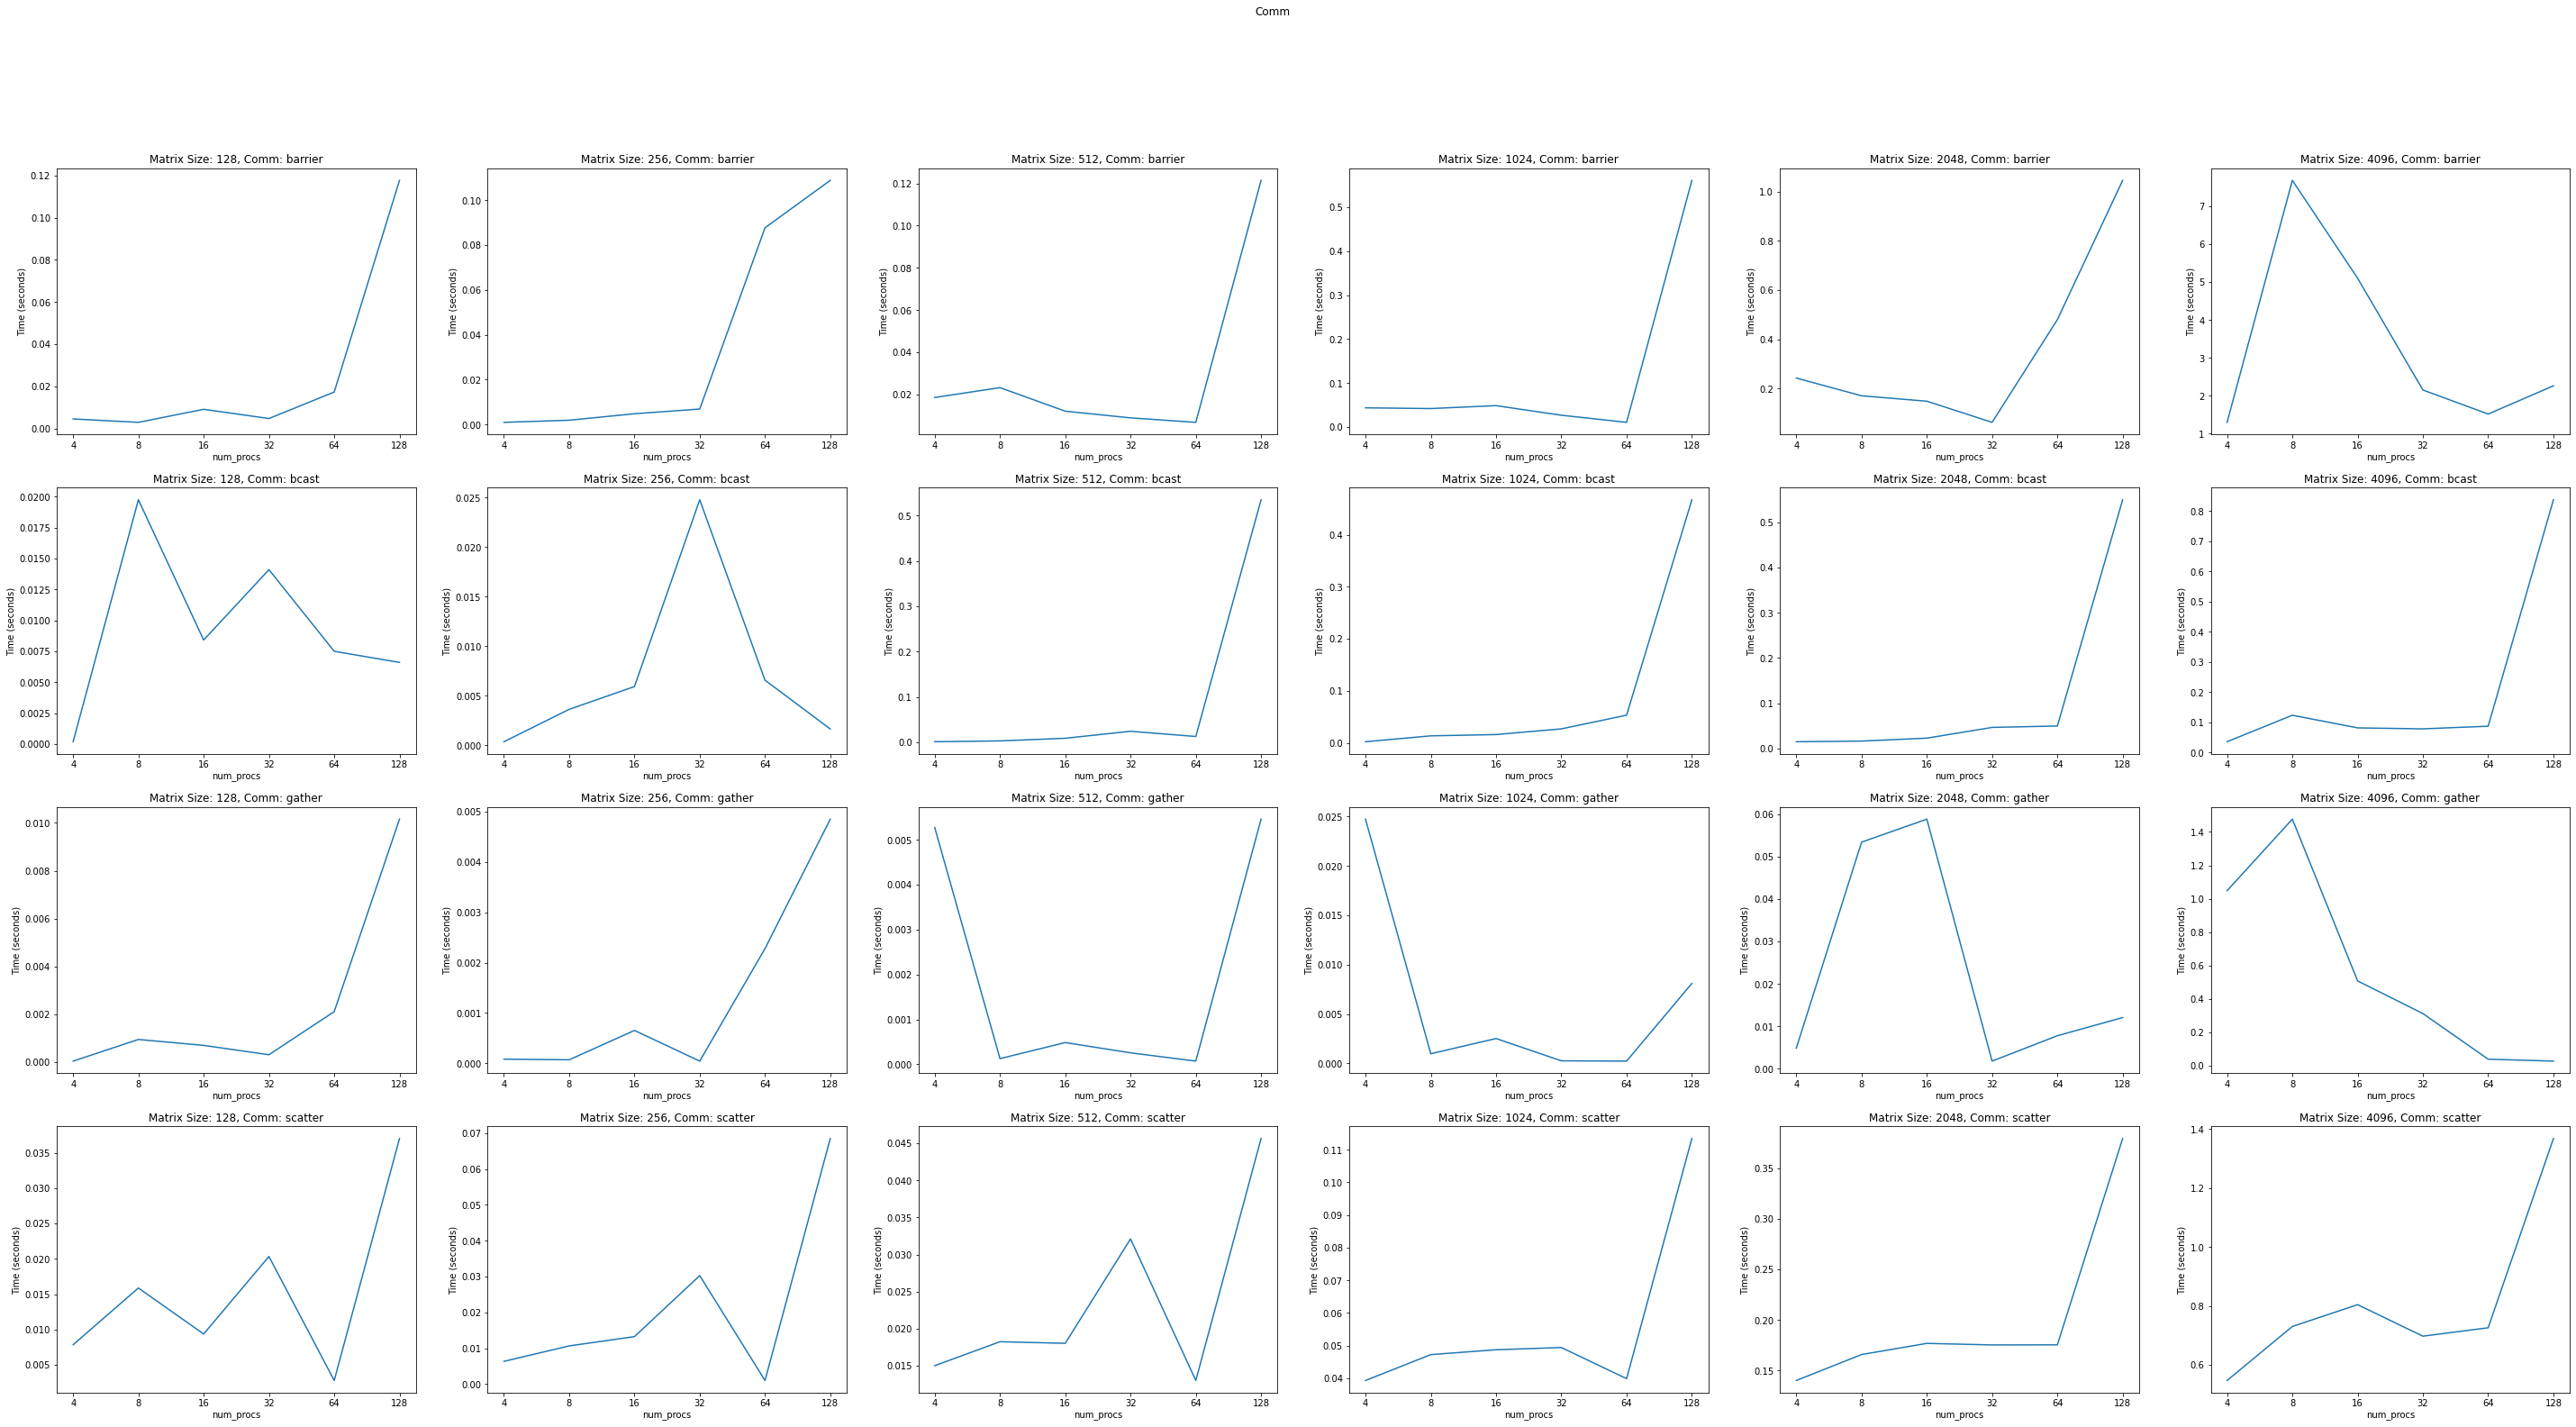

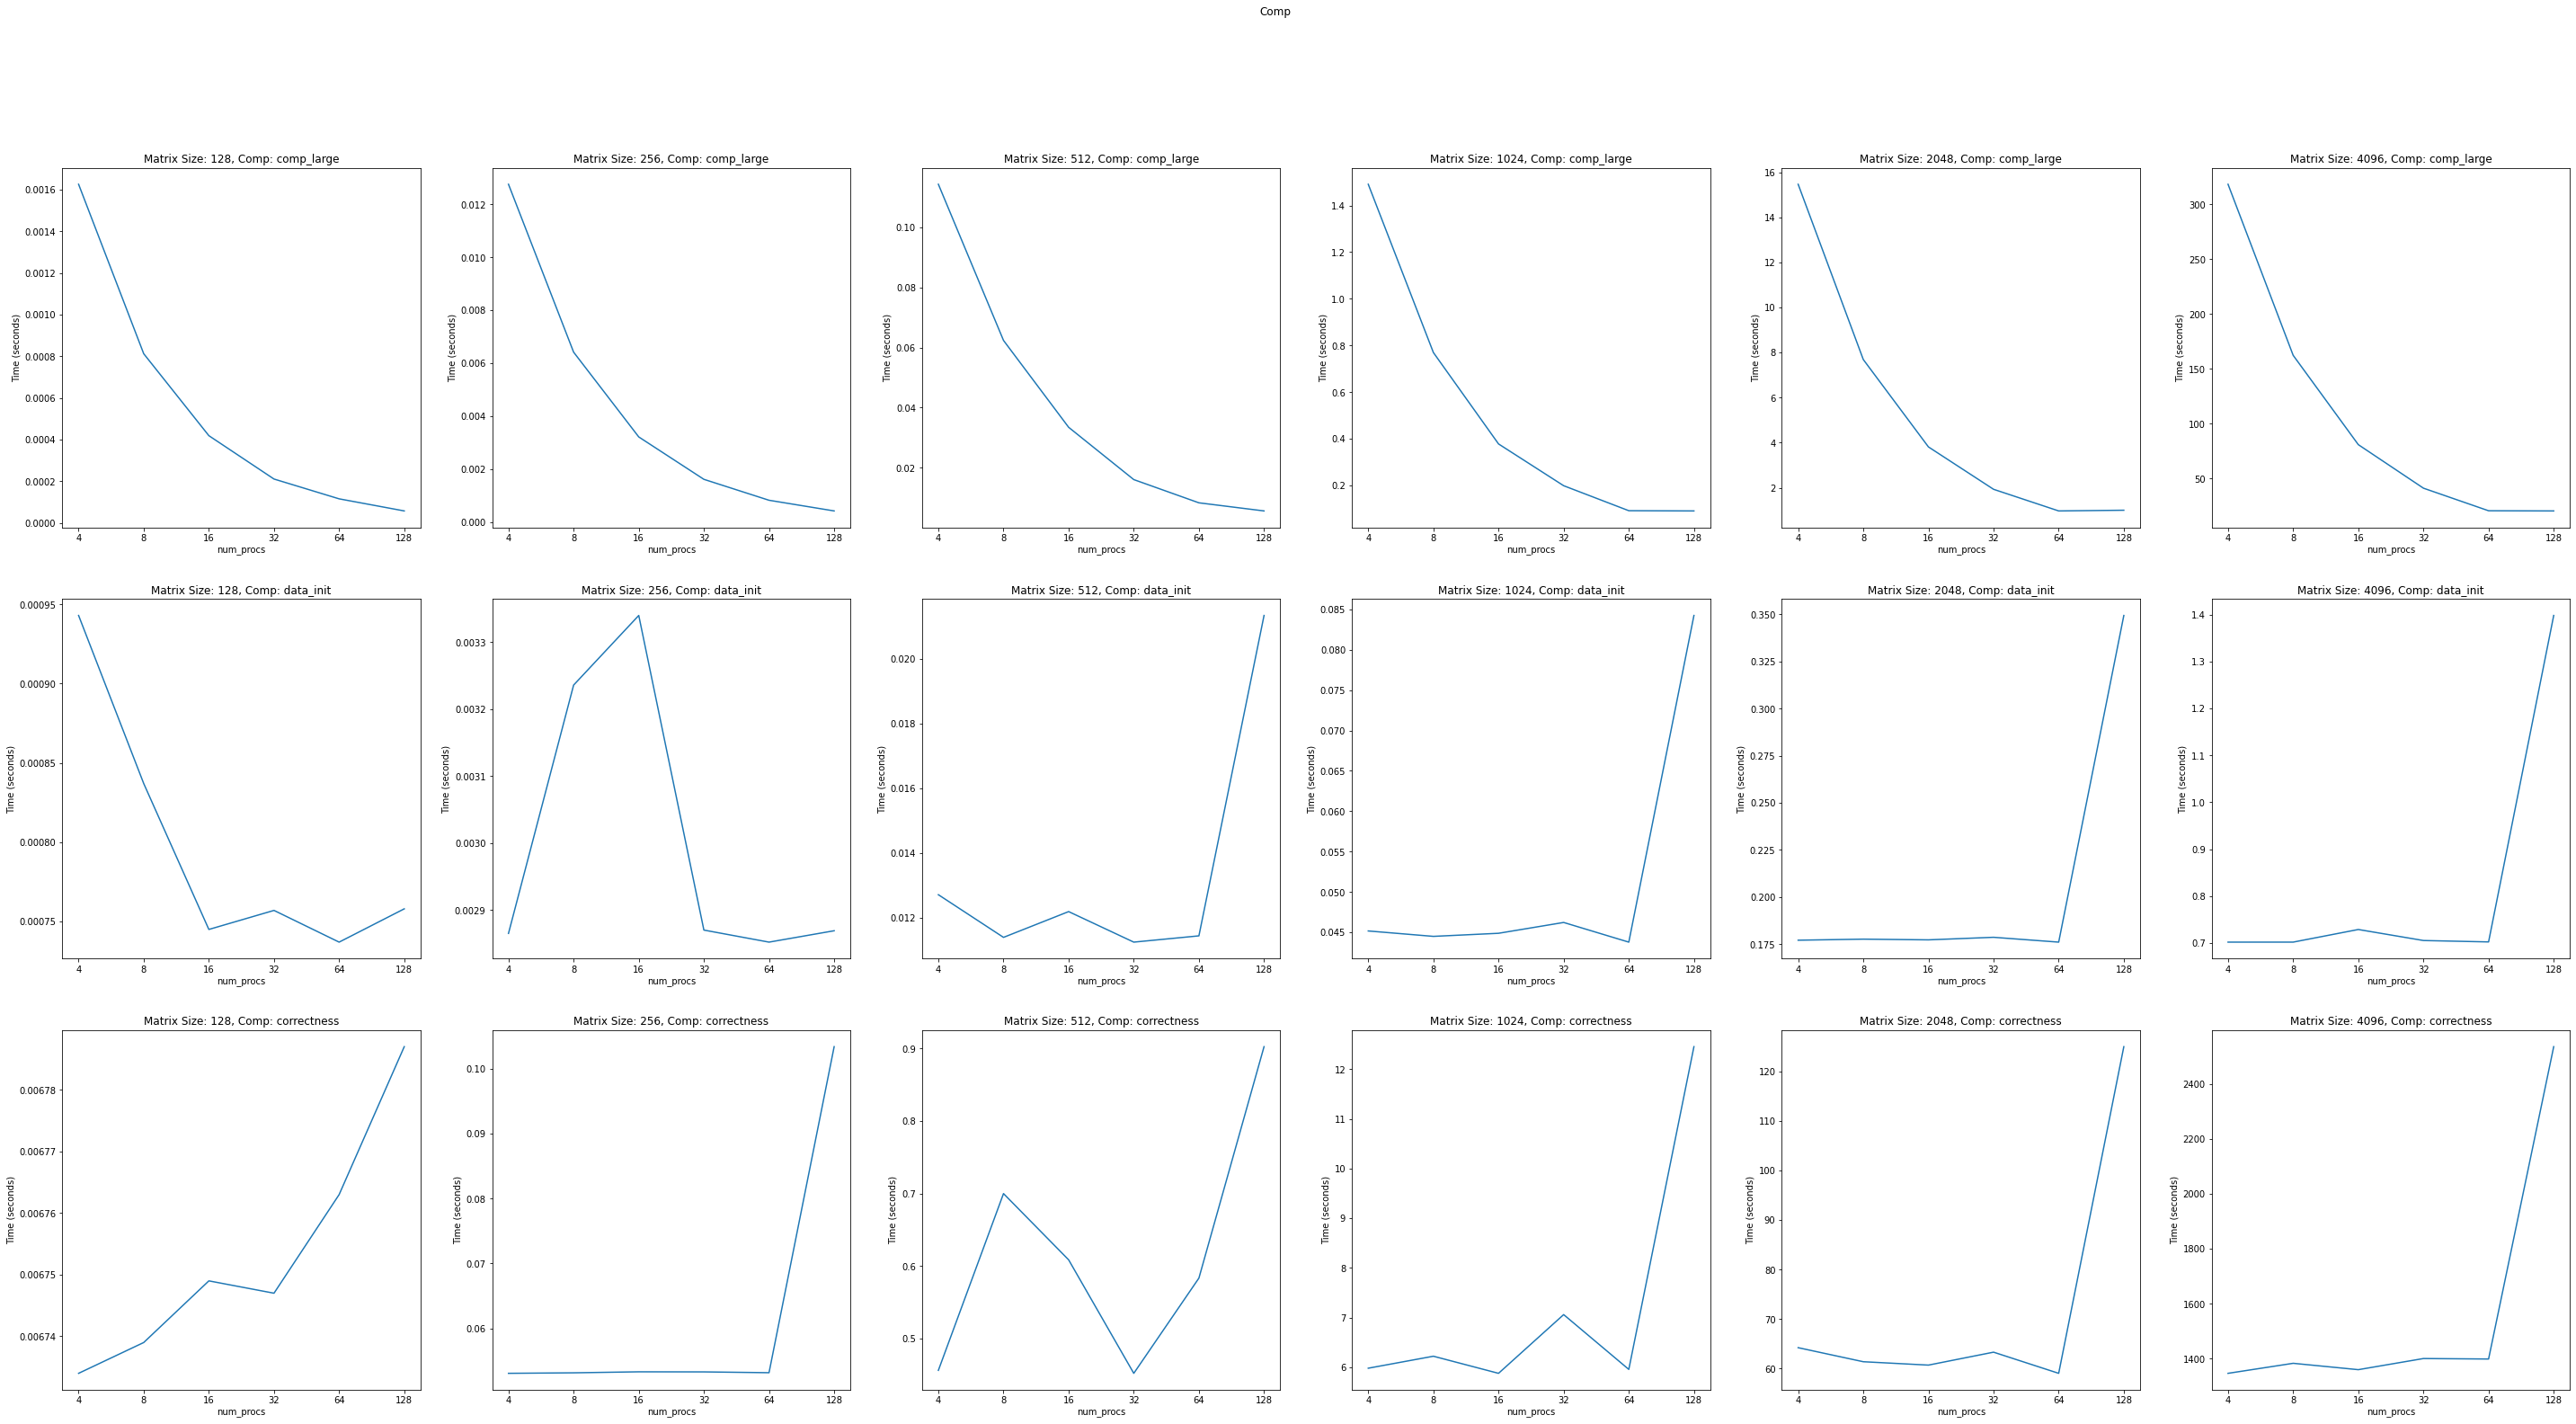

In [59]:
# print(ctk.dataframe.index)
# print(ctk.dataframe.columns)
df = ctk.dataframe
# Assuming your DataFrame is named 'df'
# Create or load your DataFrame
# df = ...

# Define the matrix sizes you want to plot
matrix_sizes = [128, 256, 512, 1024, 2048, 4096]

# Define the worker and master data series
# worker_data_series = ["worker_calculation", "worker_recieve", "worker_send"]
# master_data_series = ["whole_computation", "master_send_recieve", "master_initialization"]
comm = ["barrier","bcast","gather","scatter"]
comp = ["comp_large", "data_init", "correctness"]

# Create subplots for worker data
fig, axs = plt.subplots(4, 6, figsize=(50, 25))
# fig.suptitle("Worker Data")
fig.suptitle("Comm")

# Create subplots for master data
fig2, axs2 = plt.subplots(3, 6, figsize=(50, 25))
# fig2.suptitle("Master Data")
fig2.suptitle("Comp")

# Loop through matrix sizes and data series
for i, matrix_size in enumerate(matrix_sizes):
    for j, data_series in enumerate(comm):
        ax = axs[j, i]
#         print(ax)
        data = df.loc[(data_series, matrix_size), :]
#         print(data)
        data.index = data.index.droplevel(1)  # Remove the first level of the MultiIndex
        data.plot(ax=ax, title=f'Matrix Size: {matrix_size}, Comm: {data_series}')
        ax.set_xlabel("num_procs")
        ax.set_ylabel("Time (seconds)")

    for j, data_series in enumerate(comp):
        ax = axs2[j, i]
        data = df.loc[(data_series, matrix_size), :]
#         print(data)
        data.index = data.index.droplevel(1)  # Remove the first level of the MultiIndex
        data.plot(ax=ax, title=f'Matrix Size: {matrix_size}, Comp: {data_series}')
        ax.set_xlabel("num_procs")
        ax.set_ylabel("Time (seconds)")

# Adjust the layout
plt.tight_layout()
plt.show()


In [50]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

KeyError: 'Level num_procs not found'

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [46]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [47]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [48]:
ctk.dataframe.loc["main"]

4                                           \
          Min time/rank Max time/rank Avg time/rank   Total time   
InputSize                                                          
128            0.392027      0.398540      0.393913     1.575651   
256            0.346411      0.400129      0.360285     1.441141   
512            0.500207      0.958925      0.615386     2.461545   
1024           1.937511      7.917518      3.432799    13.731198   
2048          16.257582     80.443053     32.304383   129.217530   
4096         328.697990   1675.564007    665.414500  2661.657998   

                                         8                              \
          Variance time/rank Min time/rank Max time/rank Avg time/rank   
InputSize                                                                
128                 0.000007      0.433096      0.440360      0.434221   
256                 0.000529      0.492410      0.554987      0.503490   
512                 0.039340      0.529886      1.233589      0.620466   
1024                6.704234      1.325889      7.550431      2.105368   
2048              772.443856      8.460777     69.807645     16.129681   
4096           340134.008948    179.716693   1563.045031    352.633664   

                                                     16                \
            Total time Variance time/rank Min time/rank Max time/rank   
InputSize                                                               
128           3.473769           0.000005      6.131866      9.241619   
256           4.027923           0.000395      0.508943      0.568770   
512           4.963731           0.053707      0.520784      1.136749   
1024         16.842943           4.235534      0.951594      6.832092   
2048        129.037449         411.617690      4.591423     65.259147   
4096       2821.069309      209299.382431     94.743396   1454.893124   

                                                                   32  \
          Avg time/rank   Total time Variance time/rank Min time/rank   
InputSize                                                               
128            7.685408   122.966527           2.398687      6.152744   
256            0.518767     8.300279           0.000184      0.574143   
512            0.564259     9.028137           0.021859      0.522779   
1024           1.323841    21.181450           2.022738      0.701745   
2048           8.386800   134.188794         215.630935      2.819830   
4096         179.756225  2876.099606      108398.274082     45.091347   

                                                                       \
          Max time/rank Avg time/rank   Total time Variance time/rank   
InputSize                                                               
128            9.262938      6.933099   221.859167           1.797111   
256            0.643461      0.589362    18.859579           0.000127   
512            1.005280      0.548887    17.564379           0.006770   
1024           7.764880      0.928738    29.719625           1.507534   
2048          66.892633      5.492441   175.758118         121.681125   
4096        1445.773181     88.866504  2843.728124       59393.410687   

                     64                                           \
          Min time/rank Max time/rank Avg time/rank   Total time   
InputSize                                                          
128            6.139745      9.087473      6.514431   416.923586   
256            3.180303      3.679889      3.591665   229.866588   
512            0.460709      1.103177      0.518809    33.203748   
1024          19.128636     29.219222     22.336157  1429.514063   
2048           2.269738     62.094665      3.961659   253.546177   
4096          23.617032   1422.557660     45.483347  2910.934204   

                                       128                              \
          Variance time/rank Min time/rank Max time/rank Avg time/rank   
InputSi

In [49]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

NameError: name 'function_names' is not defined

In [ ]:
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="num_procs",
        ylabel="Time (seconds)",
    )

## Speedup

In [ ]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("threads", axis=1).set_index("name")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )